# CAUTION: FLAWED LOGIC BELOW 👇☠️

**SCROLL TO NEXT SECTION FOR CLARITY 🌿**

In [21]:
# {A, B, C}, {F, G, H, D, E} <- components (divided into sets) [goal]

# {A, B, C, F, G, H, D, E} <- vertices (all together) [init situation]

In [22]:
# Stack keeps track of order of elements (LIFO)
# Queue keeps track of order of elements (FIFO)
# LL is just a list (sequence of elements, made with chain of nodes)

# UFS keeps a track of disjoint sets:
#   Suppose you have a collection of nodes. Nodes have connection among themselves. So basically, you've a graph. This graph may have disjoint components (sets).
#   ➡️ UFS usage:
#   1. helps you to keep a track of which component a node belongs (`find()`)
#   2. helps you to merge components

In [23]:
# a graph with 2 (disconnected) components/sets.
# {A, B, C}, {F, G, H, D, E}
parent = {
    # comp 1
    'A': 'A',
    'B': 'A',  # A -> B
    'C': 'B',  # B -> C

    # comp 2
    'F': 'F',
    'G': 'F',
    'H': 'G',
    'D': 'H',
    'E': 'D',
}

# logic to init `parent` 👇
# vertices = {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'}
# parent = {}
# for u in vertices:
#   parent[u] = u

# parent

In [24]:
# find the `root node` of the component in which `node` belongs
def find(node):
  while parent[node] != node:
    node = parent[node]  # go upward in hierarchy
  return node  # final node is `root node`


print(find('D'))
print(find('H'))
print(find('F'))
print(find('C'))

F
F
F
A


In [25]:
# attempt to merge 2 disjoint components to make a single larger component
# u and v must come from DIFFERENT components
def union(u, v):
  root1 = find(u)
  root2 = find(v)
  if root1 != root2:
    parent[root2] = root1
    print('✅ merge successfully!')
    return True
  else:
    print(f'☠️ merge rejected: roots are equal, means {u=}, {v=} are in same component')
    return False


union('B', 'G')  # roots are A, F: parent[F] = A

# union('A', 'B')
# union('B', 'C')
# union('F', 'G')
# union('G', 'H')
# union('H', 'D')
# union('D', 'E')

display(parent)

✅ merge successfully!


True

{'A': 'A',
 'B': 'A',
 'C': 'B',
 'F': 'A',
 'G': 'F',
 'H': 'G',
 'D': 'H',
 'E': 'D'}

**(ACTUAL GRAPH) vs (PARENT-CHILD GRAPH OF UFS)**

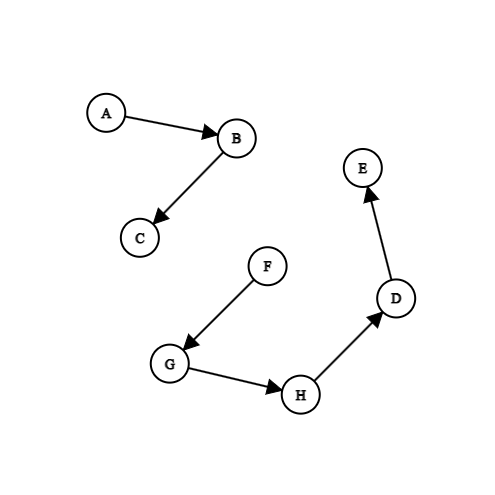 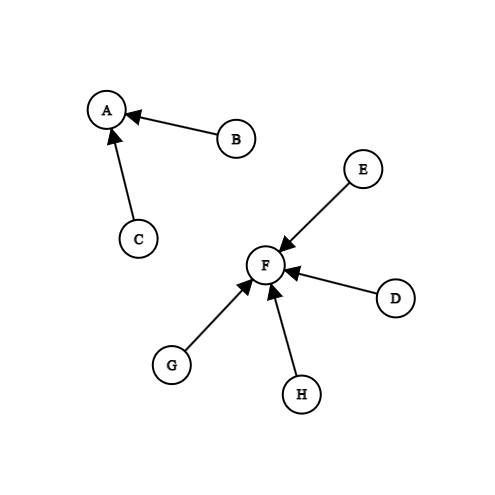

# **UNION-FIND [DOUBTS CLEARED] 🌿**

# **(ACTUAL GRAPH) vs (PARENT-CHILD GRAPH OF UFS)**

### Some utility functions

In [26]:
def print_graph_info(adjacency_list):
  """ https://csacademy.com/app/graph_editor/ """
  display('print_graph_info 👇')
  # print vertices
  for u in adjacency_list:
    print(u)
  # print edges
  for u in adjacency_list:
    for v in adjacency_list[u]:
      print(u, v)


def print_ufs_info(parent):
  """ https://csacademy.com/app/graph_editor/ """
  display('print_ufs_info 👇')
  # print vertices
  for u in parent:
    print(u)
  # print edges
  for u in parent:
    print(u, parent[u])  # u -> v (where v is parent of u)

### Tracking components in a graph

In [27]:
# ACTUAL GRAPH 😱
adjacency_list = {
    'A': [],
    'B': [],
    'C': [],
    'D': [],
    'E': [],
    'F': [],
    'G': [],
    'H': [],
}

print_graph_info(adjacency_list)

'print_graph_info 👇'

A
B
C
D
E
F
G
H


In [28]:
# PARENT-CHILD GRAPH OF UFS 😱
parent = {}

# initialize vertices (each vertex is parent of itself)
vertices = {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'}
for u in vertices:
  parent[u] = u

print_ufs_info(parent)

'print_ufs_info 👇'

H
A
F
E
G
D
B
C
H H
A A
F F
E E
G G
D D
B B
C C


In [29]:
# find the `root node` of the component in which `node` belongs
def find(node):
  while parent[node] != node:
    node = parent[node]  # go upward in hierarchy
  return node  # final node is `root node`


def union(u, v):
  root1 = find(u)
  root2 = find(v)
  if root1 != root2:
    parent[root2] = root1
    print('✅ merge successfully!')
    return True
  else:
    print(f'☠️ merge rejected: roots are equal, means {u=}, {v=} are in same component')
    return False

**GRAPH VS UFS [INITIAL CONDITION] 😱**

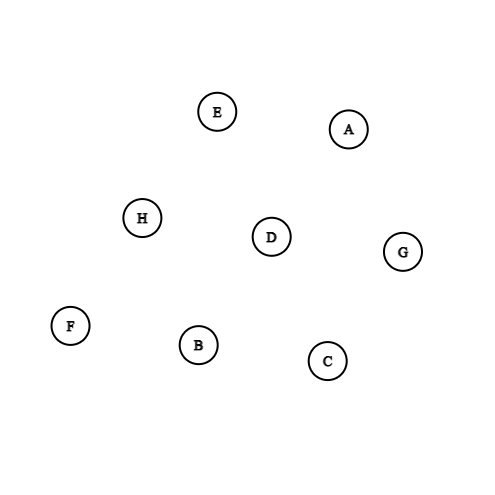 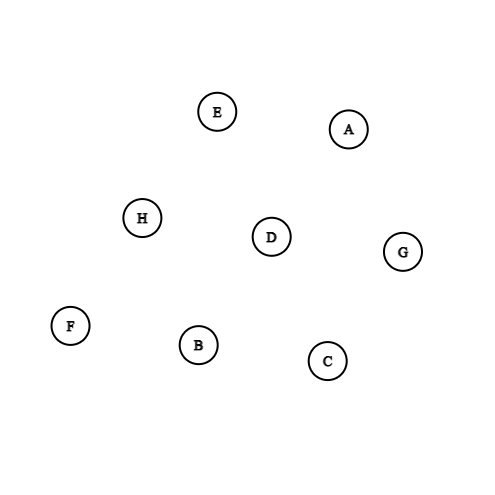

In [30]:
def draw_edge(u, v):
  adjacency_list[u].append(v)


if union('A', 'B'):
  draw_edge('A', 'B')

if union('B', 'C'):
  draw_edge('B', 'C')

if union('F', 'G'):
  draw_edge('F', 'G')

if union('G', 'H'):
  draw_edge('G', 'H')

if union('H', 'D'):
  draw_edge('H', 'D')

if union('D', 'E'):
  draw_edge('D', 'E')

✅ merge successfully!
✅ merge successfully!
✅ merge successfully!
✅ merge successfully!
✅ merge successfully!
✅ merge successfully!


In [31]:
print_graph_info(adjacency_list)
print_ufs_info(parent)

'print_graph_info 👇'

A
B
C
D
E
F
G
H
A B
B C
D E
F G
G H
H D


'print_ufs_info 👇'

H
A
F
E
G
D
B
C
H F
A A
F F
E F
G F
D F
B A
C A


**GRAPH VS UFS [AFTER WE HAVE TWO COMPONENTS] 😱**

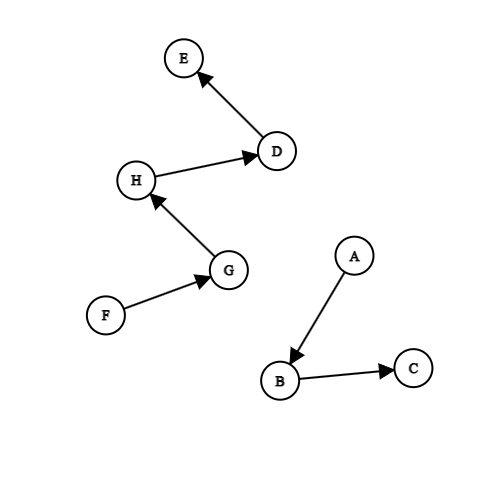 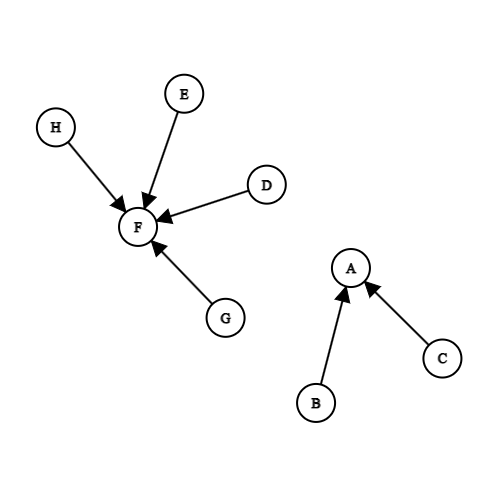

In [32]:
# attempting to merge those two components
if union('G', 'B'):
  draw_edge('G', 'B')

✅ merge successfully!


In [33]:
print_graph_info(adjacency_list)
print_ufs_info(parent)

'print_graph_info 👇'

A
B
C
D
E
F
G
H
A B
B C
D E
F G
G H
G B
H D


'print_ufs_info 👇'

H
A
F
E
G
D
B
C
H F
A F
F F
E F
G F
D F
B A
C A


**GRAPH VS UFS [AFTER WE MERGED EVERYTHING INTO A SINGLE COMPONENT] 😱**

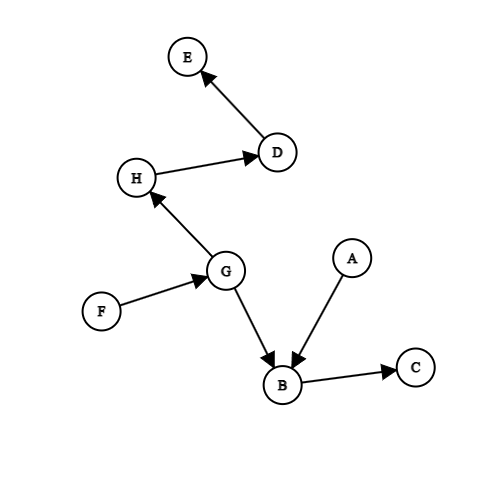 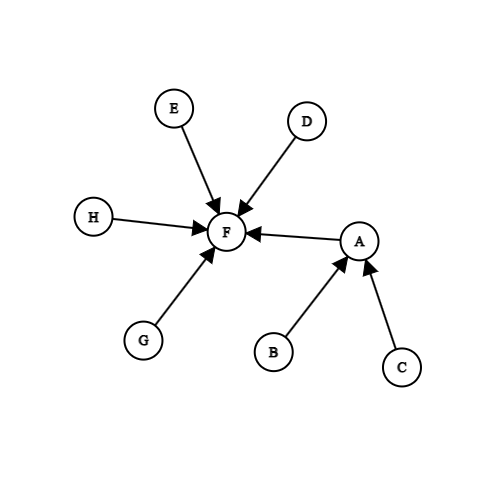